In [99]:
import lymph
import pandas as pd
import scipy as sp
import numpy as np
import numpy as np
from scipy.optimize import minimize
import pprint

In [100]:
graph_dict_II_III = {
    ('tumor', 'T')  : ['II', 'III'], 
    ('lnl'  , 'II') : ['III'], 
    ('lnl'  , 'III'): []
}

graph_dict_II_III_IV = {
    ('tumor', 'T')  : ['II', 'III', 'IV'], 
    ('lnl'  , 'II') : ['III'], 
    ('lnl'  , 'III'): ['IV'], 
    ('lnl'  , 'IV') : []
}

graph_dict_I_II_III_IV_V_VII = {
    ('tumor', 'T')  : ['I', 'II', 'III', 'IV', 'V', 'VII'], 
    ('lnl'  , 'I')  : ['II'], 
    ('lnl'  , 'II') : ['III'], 
    ('lnl'  , 'III'): ['IV'], 
    ('lnl'  , 'IV') : ['V'], 
    ('lnl'  , 'V')  : [], 
    ('lnl'  , 'VII'): []
}


# named_params = ['ipsi_TtoII_spread_ext1', 
#                 'ipsi_TtoIII_spread_ext1',
#                 'contra_TtoII_spread_ext1',
#                 'contra_TtoII_spread_ext2',
#                 'contra_TtoII_spread_ext3',
#                 'contra_TtoIII_spread_ext1',
#                 'contra_TtoIII_spread_ext2',
#                 'contra_TtoIII_spread_ext3',
#                 'IItoIII_spread',
#                 'mixing1',
#                 'mixing2',
#                 'mixing3']

dataset_url = "https://raw.githubusercontent.com/rmnldwg/lydata/main/2021-usz-oropharynx/data.csv"
csv_file_path_enhanced = r"usz_enhanced.csv"
csv_file_path_reduced = r"usz_reduced.csv"
csv_file_path_reduced_cohort = r"usz_reduced_cohort.csv"
dataset_distance_cohorts_oropharynx = pd.read_csv(csv_file_path_reduced, header = [0,1,2])
model = lymph.models.Midline(graph_dict = graph_dict_II_III_IV,
                             use_mixing = True,
                             use_cohorts = False,
                             use_midext_evo=True
                             )

In [101]:
model.load_patient_data(dataset_distance_cohorts_oropharynx)
model.set_modality("max_llh", spec=1, sens=1)

# example_cols = [("tumor", "1", "t_stage"),
#                 ("tumor", "1", "ext_coh")]
# dataset_distance_cohorts_oropharynx[example_cols]   
# params = {
#     'ipsi_TtoII_spread': 0.7,
#     'ipsi_TtoIII_spread': 0.2,
#     'contra_TtoII_spread': 0.1,
#     'contra_TtoIII_spread': 0.1,
#     'mixing1': 0.1,
#     'mixing2': 0.3,
#     'mixing3': 0.4,
#     'IItoIII_spread': 0.3
# }
example_cols = [
    ("patient", "#", "age"),
    ("patient", "#", "hpv_status"),
    ("tumor", "1", "t_stage"),
    ("tumor", "1", "extension"),
    ("PET", "ipsi", "I"),
    ("PET", "ipsi", "II"),
    ("PET", "ipsi", "III"),
    ("PET", "ipsi", "IV"),
    ("MRI", "ipsi", "I"),
    ("MRI", "ipsi", "II"),
    ("MRI", "ipsi", "III"),
    ("MRI", "ipsi", "IV"),
]
dataset_distance_cohorts_oropharynx[example_cols]


/mnt/data/loriskeller/Documents/Master Project/VS/lymph_stuff/lymph/lymph/models/unilateral.py:529: DataWarning: ipsilateral involvement data not found. Skipping modality Unnamed: 222_level_0.
  warnings.warn(
/mnt/data/loriskeller/Documents/Master Project/VS/lymph_stuff/lymph/lymph/models/unilateral.py:529: DataWarning: contralateral involvement data not found. Skipping modality Unnamed: 222_level_0.
  warnings.warn(
/mnt/data/loriskeller/Documents/Master Project/VS/lymph_stuff/lymph/lymph/models/unilateral.py:529: DataWarning: ipsilateral involvement data not found. Skipping modality Unnamed: 222_level_0.
  warnings.warn(
/mnt/data/loriskeller/Documents/Master Project/VS/lymph_stuff/lymph/lymph/models/unilateral.py:529: DataWarning: contralateral involvement data not found. Skipping modality Unnamed: 222_level_0.
  warnings.warn(


patient              tumor              PET                         MRI  \
          #                  1             ipsi                        ipsi   
        age hpv_status t_stage extension      I     II    III     IV      I   
0        75       True       2     False    NaN    NaN    NaN    NaN  False   
1        70       True       2     False  False   True  False  False    NaN   
2        62       True       3     False  False  False  False  False  False   
3        82       True       2     False    NaN    NaN    NaN    NaN  False   
4        65       True       4     False  False   True   True   True    NaN   
..      ...        ...     ...       ...    ...    ...    ...    ...    ...   
190      49      False       4      True   True   True   True  False    NaN   
191      67       True       4     False  False   True   True  False  False   
192      44      False       4      True  False   True   True  False    NaN   
193      67      False       4      True  False   True   True  False    NaN   
194      76       True       2     False  False   True   True  False    NaN   

                          
                          
        II    III     IV  
0    False   True  False  
1      NaN    NaN    NaN  
2     True  False  False  
3    False  False  False  
4      NaN    NaN    NaN  
..     ...    ...    ...  
190    NaN    NaN    NaN  
191   True   True  False  
192    NaN    NaN    NaN  
193    NaN    NaN    NaN  
194    NaN    NaN    NaN  

[195 rows x 12 columns]

In [102]:
# model.set_params(**params)

# p = model.get_params()  
# print(p)

# ipsi_II = p["ipsi_TtoII_spread"]
# ipsi_III = p["ipsi_TtoIII_spread"]
# mix1 = p["mixing1"]
# mix2 = p["mixing2"]
# mix3 = p["mixing3"]
# noext_II = p["contra_TtoII_spread"]
# noext_III = p["contra_TtoIII_spread"]

# # 3) compute the cohort‐1 contralateral spread
# contra_TtoII_spread_ext1 = ipsi_II * mix1 + (1 - mix1) * noext_II
# contra_TtoII_spread_ext2 = ipsi_II * mix2 + (1 - mix2) * noext_II
# contra_TtoII_spread_ext3 = ipsi_II * mix3 + (1 - mix3) * noext_II

# contra_TtoIII_spread_ext1 = ipsi_III * mix1 + (1 - mix1) * noext_III
# contra_TtoIII_spread_ext2 = ipsi_III * mix2 + (1 - mix2) * noext_III
# contra_TtoIII_spread_ext3 = ipsi_III * mix3 + (1 - mix3) * noext_III

# print(f"contra_TtoII_spread_ext1: {contra_TtoII_spread_ext1}")
# print(f"contra_TtoII_spread_ext2: {contra_TtoII_spread_ext2}")
# print(f"contra_TtoII_spread_ext3: {contra_TtoII_spread_ext3}")
# print(f"contra_TtoIII_spread_ext1: {contra_TtoIII_spread_ext1}")
# print(f"contra_TtoIII_spread_ext2: {contra_TtoIII_spread_ext2}")
# print(f"contra_TtoIII_spread_ext3: {contra_TtoIII_spread_ext3}")

In [103]:
rng = np.random.default_rng(42)

max_time = model.max_time
time_steps = np.arange(max_time+1)
p = 0.3

early_prior = sp.stats.binom.pmf(time_steps, max_time, p)
model.set_distribution("early", early_prior)

def late_binomial(support: np.ndarray, p: float = 0.5) -> np.ndarray:
    """Parametrized binomial distribution."""
    return sp.stats.binom.pmf(support, n=support[-1], p=p)

model.set_distribution("late", late_binomial)

In [104]:
def llh(params):
    test = True
    for key in params.keys():
        if params[key] > 1 or params[key] < 0:
            test = False
    if not test:
        return -np.inf
    else:
        model.set_params(**params)
        return model.likelihood()

In [105]:
import emcee

nwalkers, ndim = 100, len(model.get_params())
nsteps = 5000
initial = np.random.uniform(size=(nwalkers, ndim))

In [106]:
sampler = emcee.EnsembleSampler(
    nwalkers=nwalkers,
    ndim=ndim,
    log_prob_fn=llh,
    parameter_names=list(model.get_params().keys()),
)

In [107]:
from multiprocessing import cpu_count

ncpu = cpu_count()
print("{0} CPUs".format(ncpu))

16 CPUs


In [108]:
from multiprocessing import Pool

with Pool() as pool:
    sampler = emcee.EnsembleSampler(
        nwalkers=nwalkers,
        ndim=ndim,
        log_prob_fn=llh,
        pool=pool,  # ← THIS is what enables parallelism
        parameter_names=list(model.get_params().keys()),
    )
    sampler.run_mcmc(initial_state=initial, nsteps=nsteps, progress=True)


100%|██████████| 5000/5000 [04:07<00:00, 20.24it/s]


In [109]:
tau = 2500
burnin = int(2 * np.max(tau))
thin = 10
samples = sampler.get_chain(discard=burnin, flat=True, thin=thin)

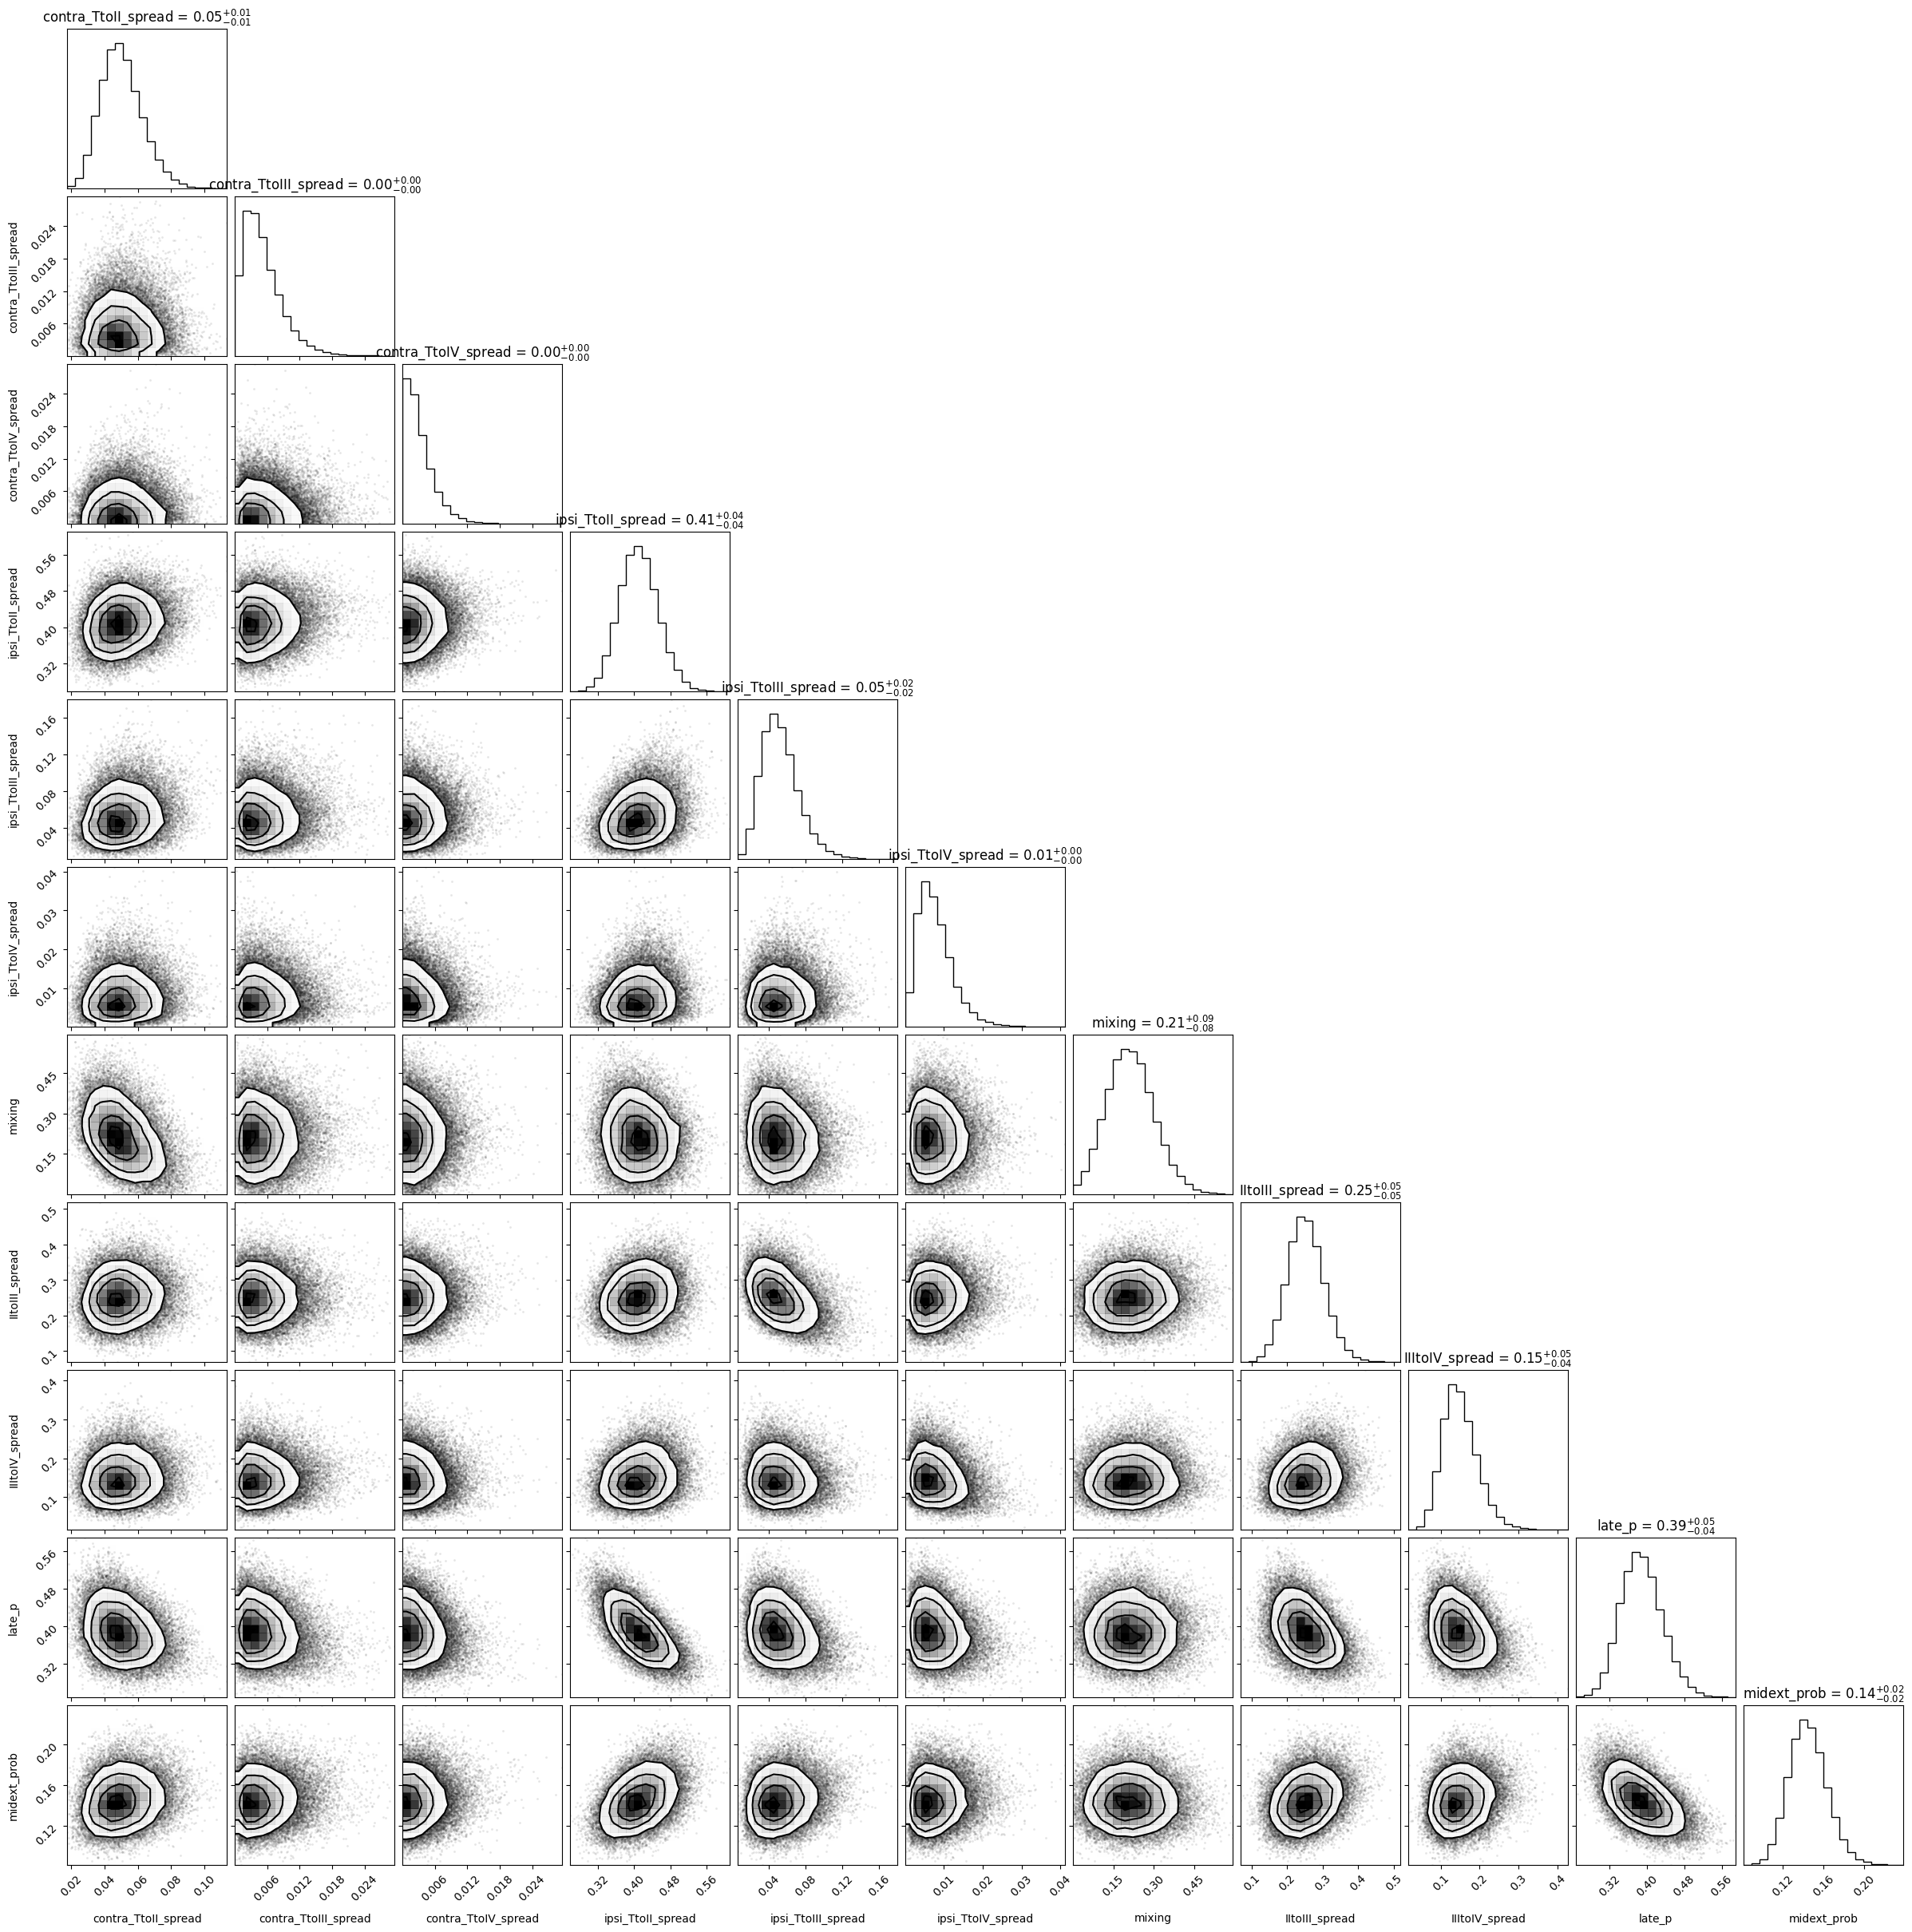

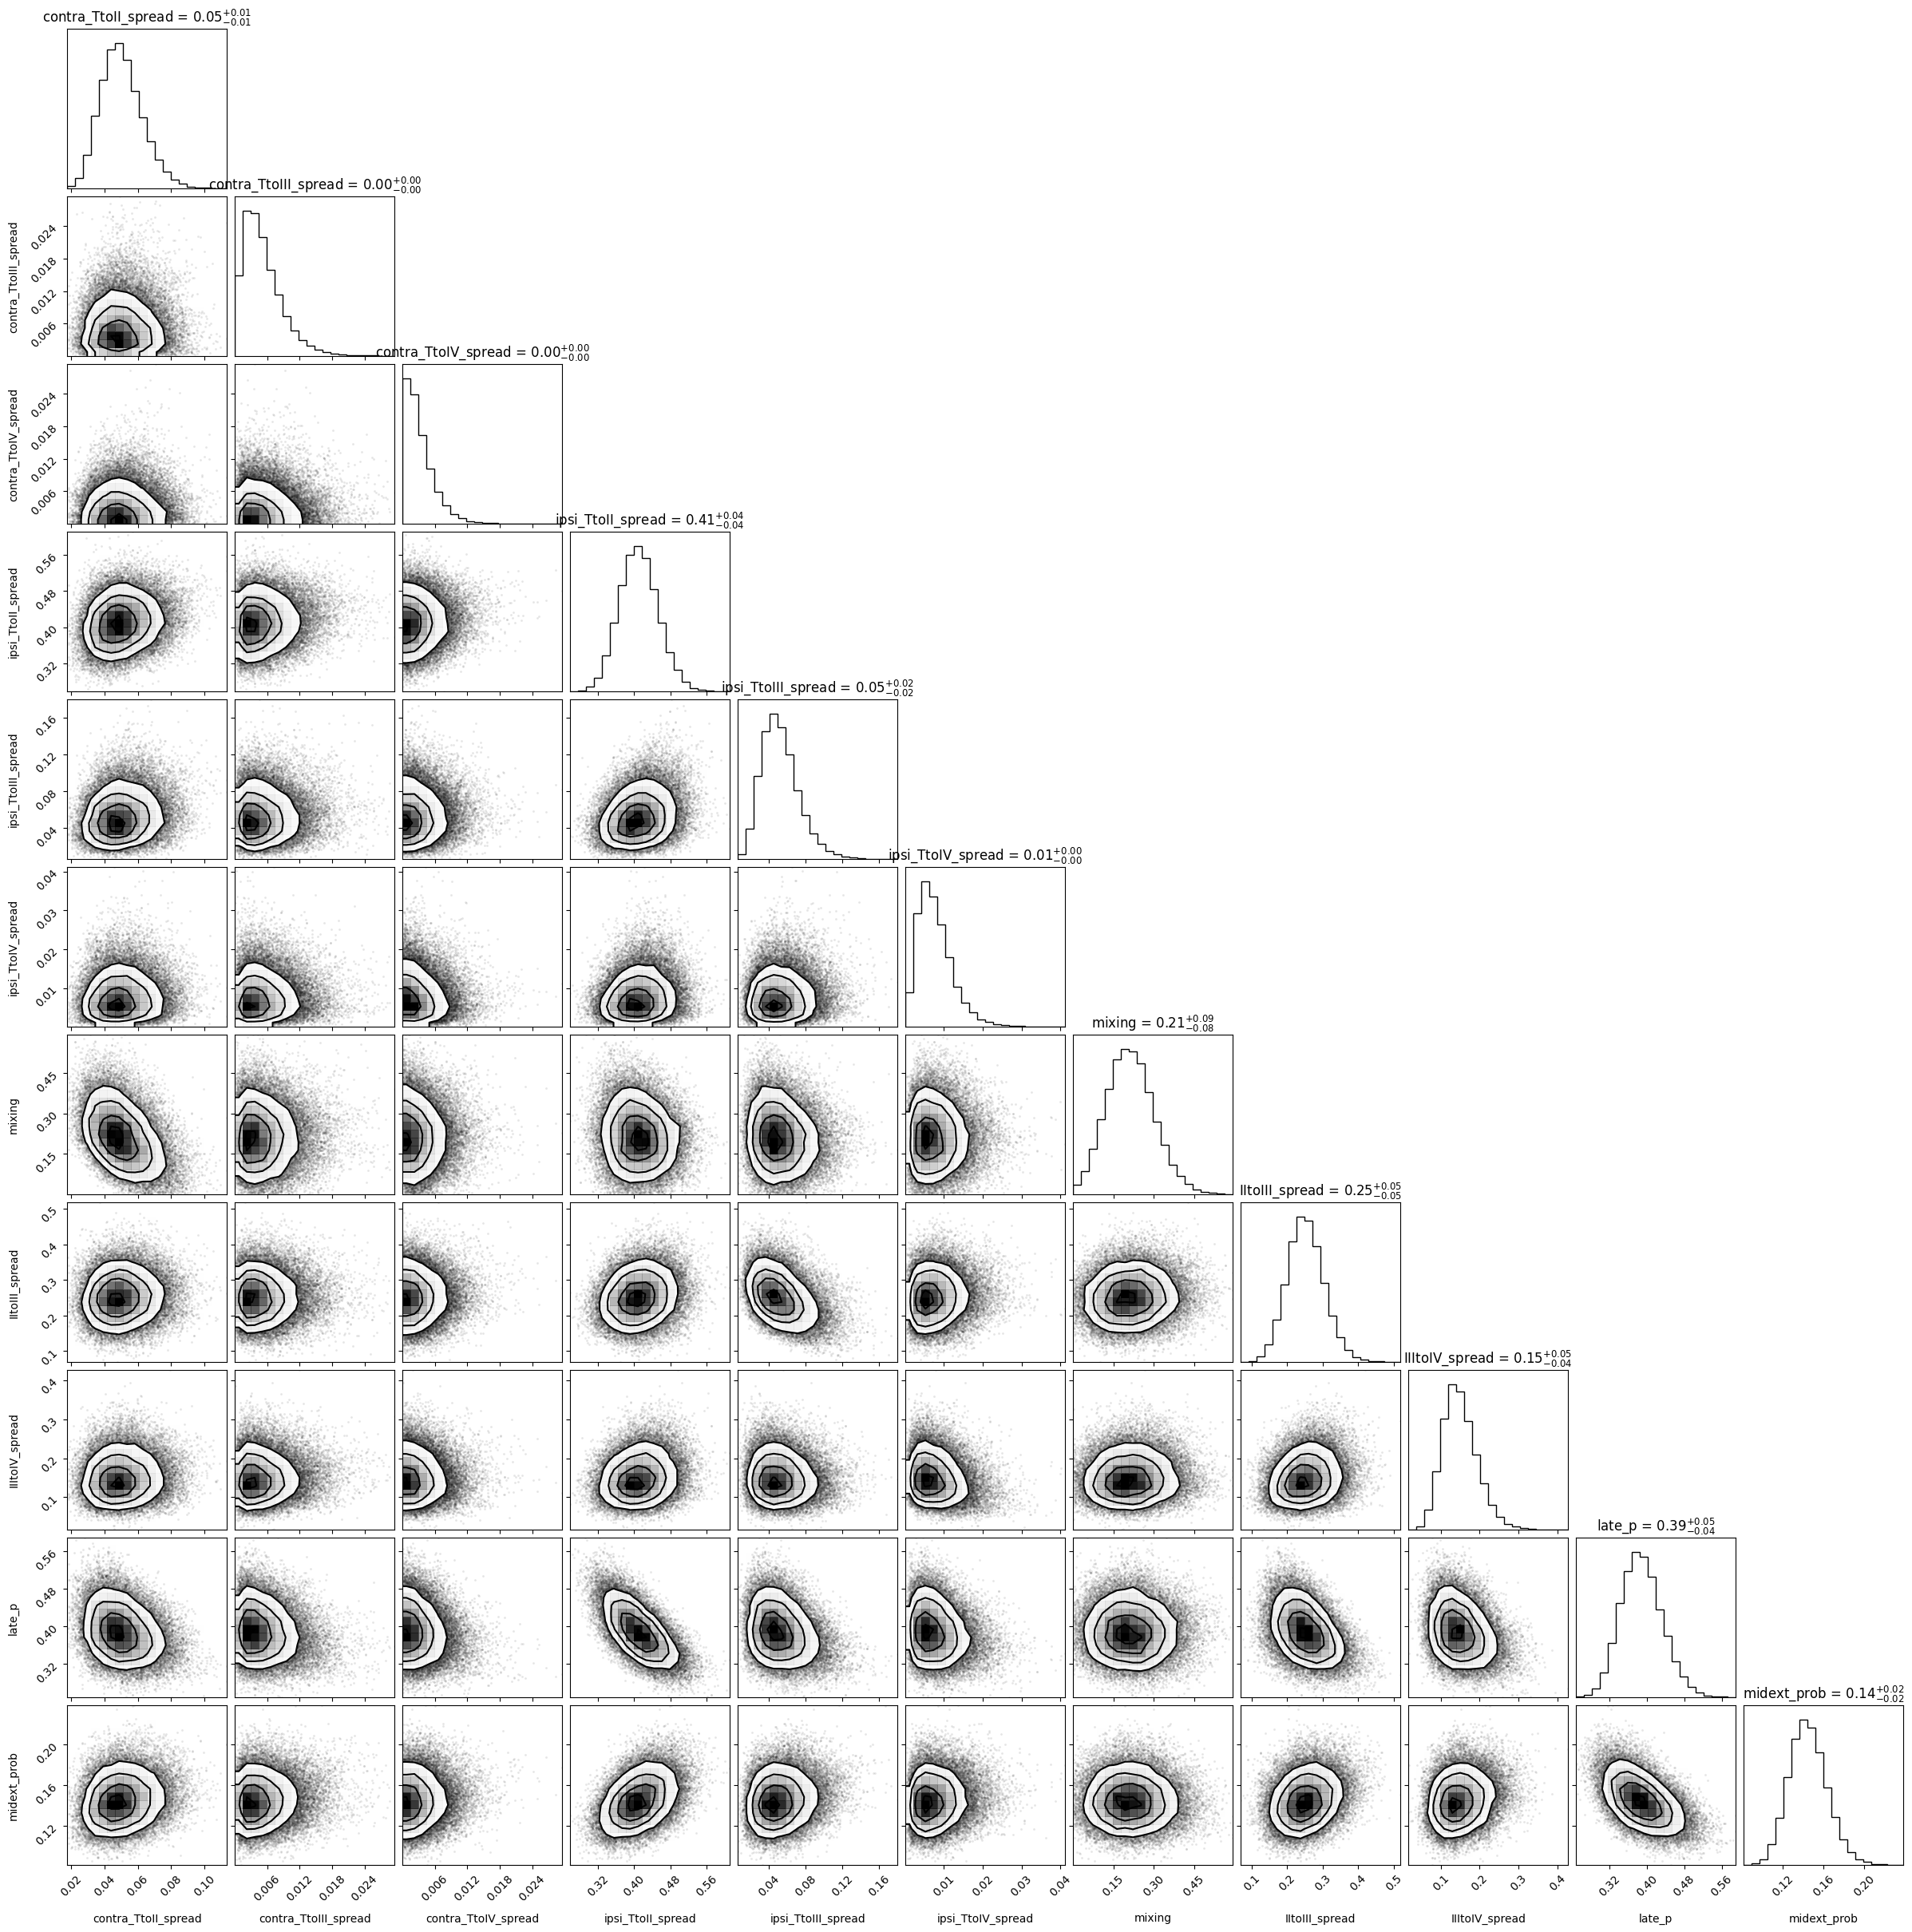

In [110]:
import corner

samples = sampler.get_chain(discard=int(0.1 * nsteps), flat=True, thin = 10)
corner.corner(samples, labels=list(model.get_params().keys()), show_titles=True, )

In [111]:

param_values = samples.mean(axis = 0)

params_to_set = {key: value for key, value in zip(list(model.get_params().keys()), param_values)}
model.set_params(**params_to_set)
model.likelihood()

np.float64(-550.8942303213059)

In [112]:
{key: round(value, 3) for key, value in model.get_params().items()}

{'contra_TtoII_spread': np.float64(0.05),
 'contra_TtoIII_spread': np.float64(0.005),
 'contra_TtoIV_spread': np.float64(0.003),
 'ipsi_TtoII_spread': np.float64(0.41),
 'ipsi_TtoIII_spread': np.float64(0.053),
 'ipsi_TtoIV_spread': np.float64(0.008),
 'mixing': np.float64(0.215),
 'IItoIII_spread': np.float64(0.252),
 'IIItoIV_spread': np.float64(0.15),
 'late_p': np.float64(0.39),
 'midext_prob': np.float64(0.145)}

In [ ]:
# fix your seed for reproducibility
seed = 42
rng  = np.random.default_rng(seed)

# grab the names & initial *length*
init_dict   = model.get_params(as_dict=True)
param_names = list(init_dict.keys())
ndim        = len(param_names)
# draw a random starting point in [0,1]^ndim

x0 = rng.random(ndim)

for i, name in enumerate(param_names):
    print(f"{name} = {x0[i]:.3f}")
      

In [ ]:
# # 1) grab the names & initial values
# #init_dict = model.get_params(as_dict=True)
# param_names = list(init_dict.keys())
# #x0 = np.array(list(init_dict.values()))

# # 2) negative log‐likelihood objective
# def neg_loglik(x: np.ndarray) -> float:
#     # map back to named params
#     p = dict(zip(param_names, x))
#     ll = model.likelihood(given_params=p, log=True)
#     # penalty if invalid
#     return -ll if np.isfinite(ll) else 1e8
# bounds = [(0.0, 1.0)] * ndim

# # for i, name in enumerate(param_names):
# #     if name == "late_p":
# #         bounds[i] = (0.3, 1.0)
# # 3) run optimization
# method = "Powell"
# #method = "Nelder-Mead"  # or "Powell", "L-BFGS-B", etc.
# res = minimize(
#     fun=neg_loglik,
#     x0=x0,
#     bounds=bounds,
#     method=method,
#     options={"maxiter": 1000, "disp": True},
# )

# # 4) unpack & load optimized params
# opt_x = res.x
# opt_params = dict(zip(param_names, opt_x))
# model.set_params(**opt_params)

# print("Powell optimize success:", res.success, res.message)
# print("Optimized parameters:")
# params_rounded = {k: round(float(v), 4) for k, v in model.get_params(as_dict=True).items()}
# pprint.pprint(params_rounded)